In [1]:
!pip install seaborn

^C


In [25]:
!pip install sklearn

^C


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import seaborn as sns
%matplotlib inline

In [3]:
os.listdir()

['.ipynb_checkpoints', 'EDA.ipynb', 'malevis_train_val_224x224']

In [4]:
train_folder_path='malevis_train_val_224x224/train'

In [5]:
os.chdir(train_folder_path)

In [6]:
train_folder_list=os.listdir()

In [7]:
train_folder_list

['Adposhel',
 'Agent',
 'Allaple',
 'Amonetize',
 'Androm',
 'Autorun',
 'BrowseFox',
 'Dinwod',
 'Elex',
 'Expiro',
 'Fasong',
 'HackKMS',
 'Hlux',
 'Injector',
 'InstallCore',
 'MultiPlug',
 'Neoreklami',
 'Neshta',
 'Other',
 'Regrun',
 'Sality',
 'Snarasite',
 'Stantinko',
 'VBA',
 'VBKrypt',
 'Vilsel']

In [8]:
train_dict={}

In [9]:
for item in train_folder_list:
    owd = os.getcwd()
    os.chdir(item)
    train_dict[item]=len(os.listdir())
    os.chdir(owd)

In [10]:
train_dict

{'Adposhel': 350,
 'Agent': 350,
 'Allaple': 350,
 'Amonetize': 350,
 'Androm': 350,
 'Autorun': 350,
 'BrowseFox': 350,
 'Dinwod': 350,
 'Elex': 350,
 'Expiro': 350,
 'Fasong': 350,
 'HackKMS': 350,
 'Hlux': 350,
 'Injector': 350,
 'InstallCore': 350,
 'MultiPlug': 350,
 'Neoreklami': 350,
 'Neshta': 350,
 'Other': 350,
 'Regrun': 350,
 'Sality': 350,
 'Snarasite': 350,
 'Stantinko': 350,
 'VBA': 350,
 'VBKrypt': 350,
 'Vilsel': 350}

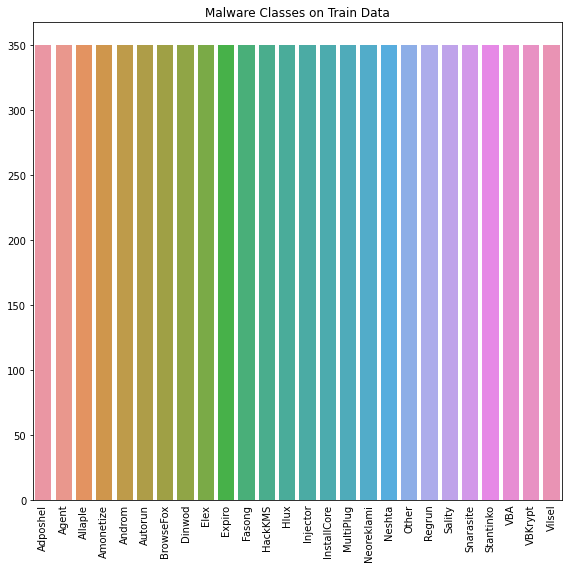

In [11]:
fig,x=plt.subplots(figsize=(8,8))
keys = list(train_dict.keys())
vals = list(train_dict.values())
sns.barplot(x=keys, y=vals)
plt.setp(x.get_xticklabels(), rotation=90)
plt.title('Malware Classes on Train Data')
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()

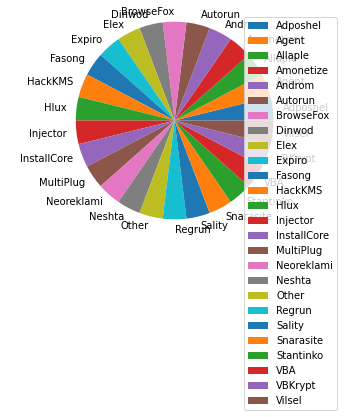

<Figure size 3600x432 with 0 Axes>

In [12]:
# Data to plot
labels = []
sizes = []

for x, y in train_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.legend()
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(6)
  
plt.show()

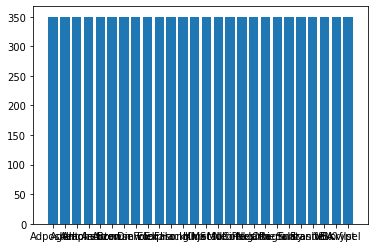

<Figure size 7200x1440 with 0 Axes>

In [13]:
plt.bar(*zip(*train_dict.items()))
plt.figure(figsize=(100,20))
plt.show()

In [14]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path +str("/")+ fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat



In [15]:
os.getcwd()

'C:\\Users\\Hp\\Desktop\\Malware Project\\malevis_train_val_224x224\\train'

Images as Matrix

In [16]:
train_dict_img={}

In [17]:
for item in train_folder_list:
    owd = os.getcwd()
    os.chdir(item)
    print(os.getcwd())
    #print(os.listdir())
    train_dict_img[item]=img2np(os.getcwd(),os.listdir())
    os.chdir(owd)

C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Adposhel
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Agent
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Allaple
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Amonetize
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Androm
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Autorun
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\BrowseFox
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Dinwod
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Elex
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Expiro
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Fasong
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\HackKMS
C:\Users\Hp\Desktop\Malware Project\malevis_train_val_224x224\train\Hlux
C:\Users\Hp\Desktop

In [18]:
os.getcwd()

'C:\\Users\\Hp\\Desktop\\Malware Project\\malevis_train_val_224x224\\train'

In [19]:
train_dict_img

{'Adposhel': array([[ 96., 116., 104., ...,  90.,  77.,  76.],
        [118., 132., 120., ..., 131., 116., 131.],
        [116., 111.,  91., ...,  67.,  75.,  44.],
        ...,
        [111., 106.,  99., ..., 117., 115., 137.],
        [120., 125., 123., ..., 113., 149., 100.],
        [105., 127., 135., ..., 110., 132., 132.]], dtype=float32),
 'Agent': array([[ 94.,  79., 136., ...,  39.,  47.,  37.],
        [ 94.,  79., 135., ...,  22.,  28.,  36.],
        [ 94.,  79., 135., ...,  41.,  35.,  32.],
        ...,
        [121., 118.,  74., ...,  46.,  74.,  66.],
        [138., 118., 129., ..., 127., 146., 149.],
        [102., 137., 113., ..., 142., 143., 124.]], dtype=float32),
 'Allaple': array([[  1., 102.,  17., ...,  11.,   3.,   5.],
        [162.,  85., 130., ...,  89.,  34.,  57.],
        [  0.,  92.,  16., ...,  24.,  20.,  14.],
        ...,
        [153., 103., 143., ...,  63.,  34.,  32.],
        [130.,  98.,  88., ...,  62.,  35.,  41.],
        [134., 111., 136., .

Average Image

In [20]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

In [21]:
train_dict_mean={}

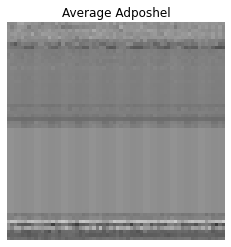

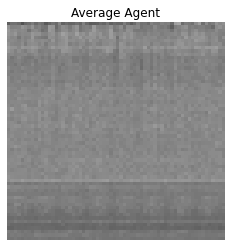

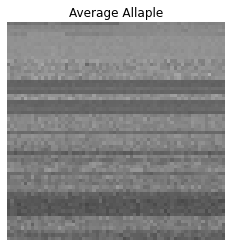

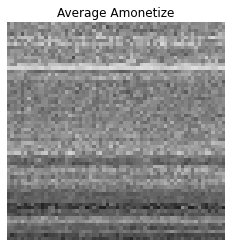

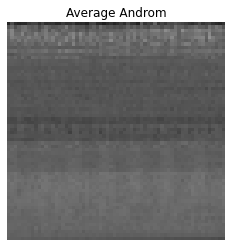

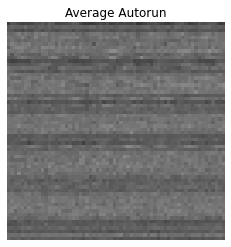

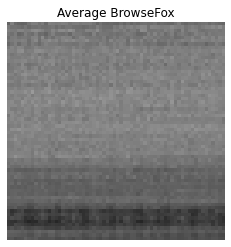

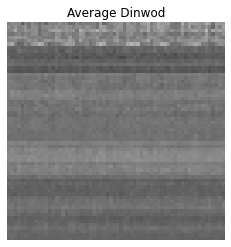

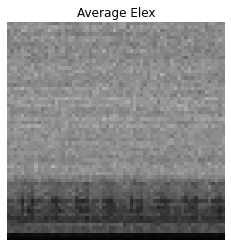

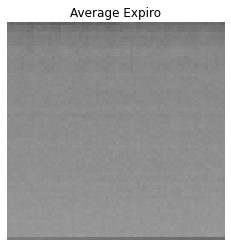

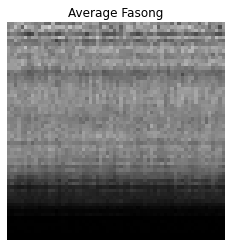

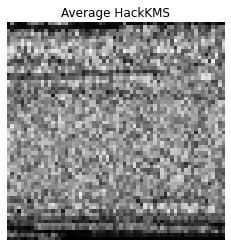

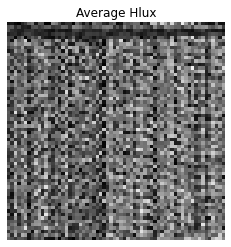

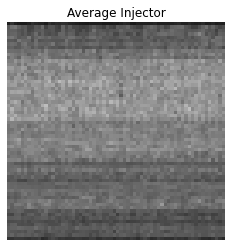

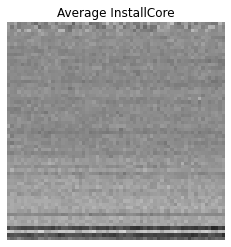

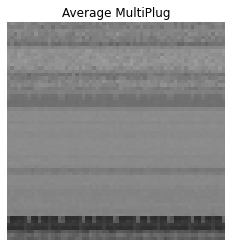

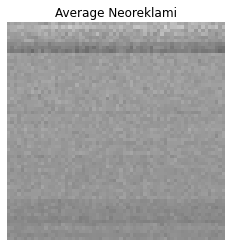

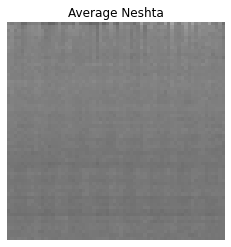

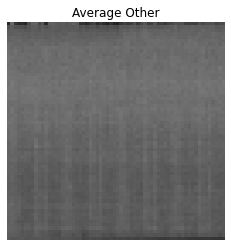

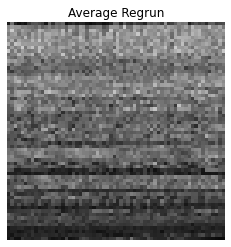

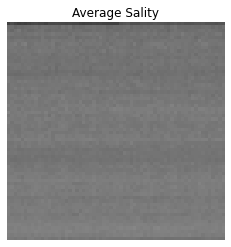

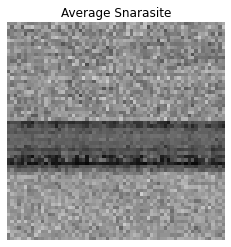

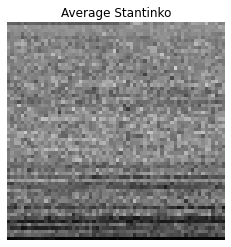

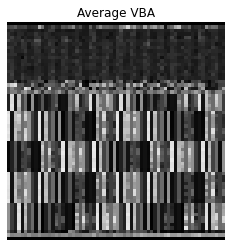

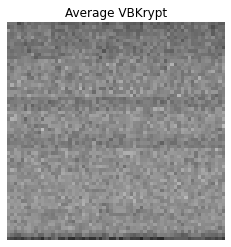

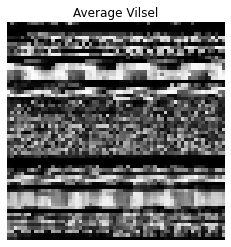

In [22]:
for item in train_dict_img:
    train_dict_mean[item]=find_mean_img(train_dict_img[item], item)

In [27]:
from sklearn.decomposition import PCA
from math import ceil

def eigenimages(full_mat, title, n_comp = 0.7, size = (64, 64)):
    # fit PCA to describe n_comp * variability in the class
    pca = PCA(n_components = n_comp, whiten = True)
    pca.fit(full_mat)
    print('Number of PC: ', pca.n_components_)
    return pca
  
def plot_pca(pca, size = (64, 64)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(8, 8))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r')
    plt.axis('off')
    plt.show()
    

Number of PC:  1


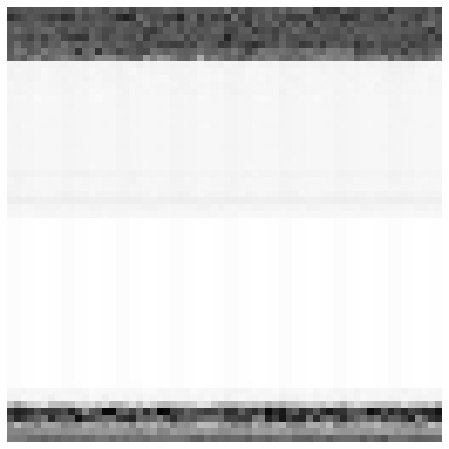

Number of PC:  31


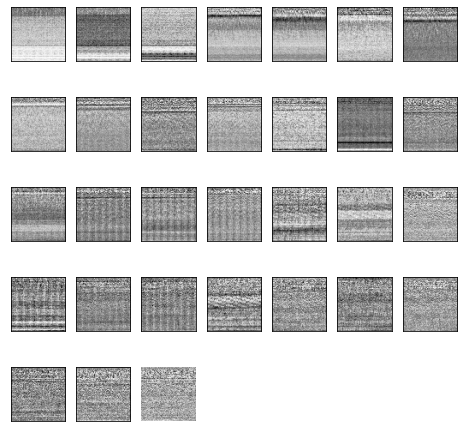

Number of PC:  19


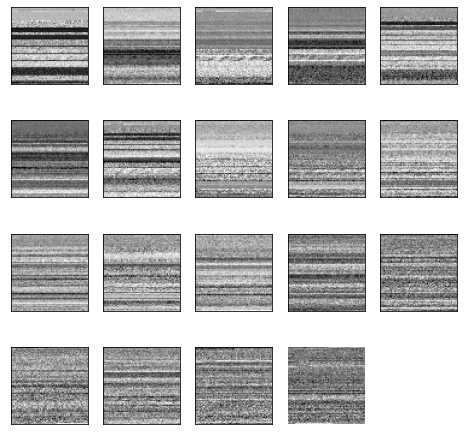

Number of PC:  6


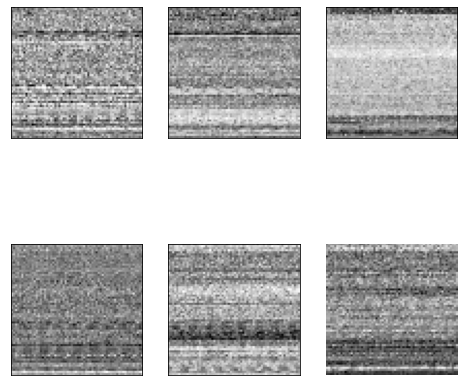

Number of PC:  12


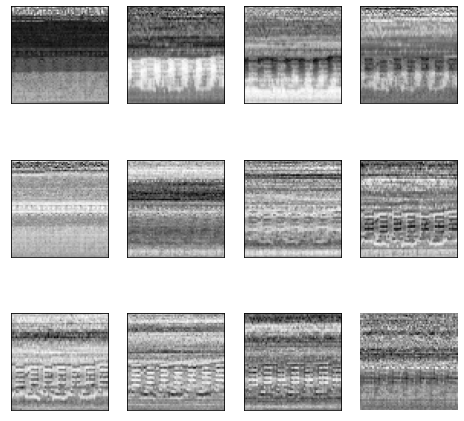

Number of PC:  6


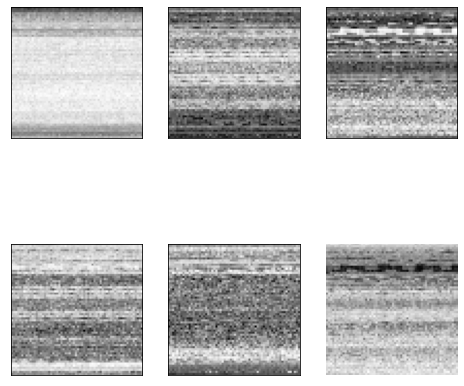

Number of PC:  10


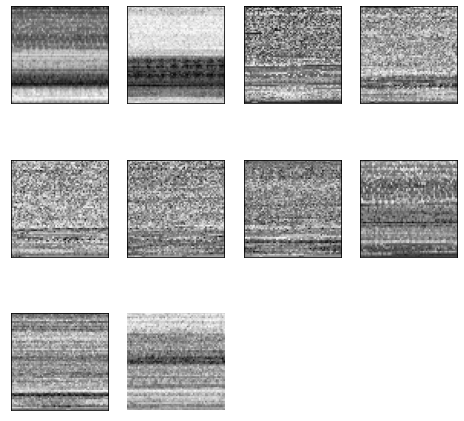

Number of PC:  5


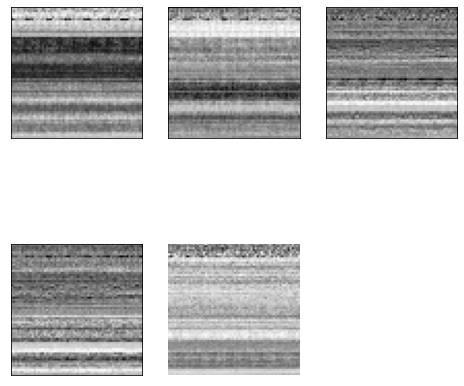

Number of PC:  9


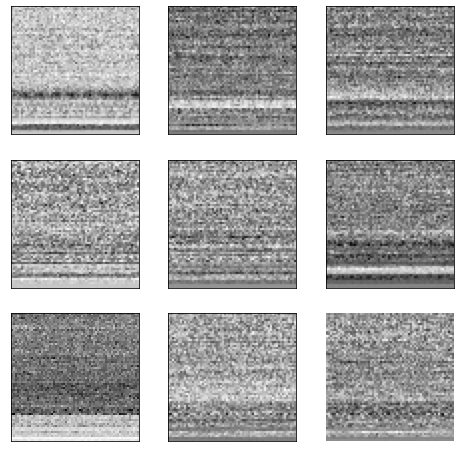

Number of PC:  91


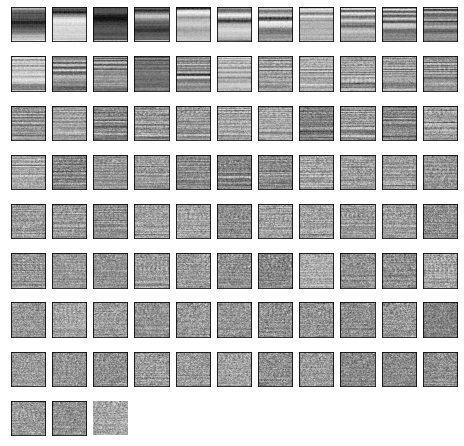

Number of PC:  7


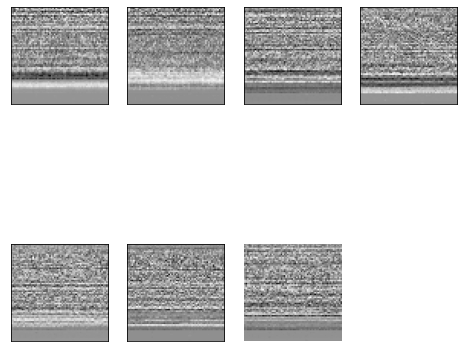

Number of PC:  2


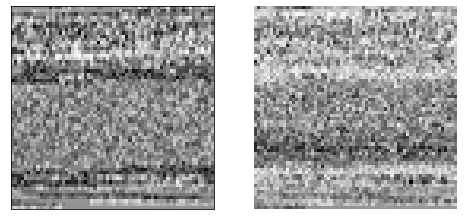

Number of PC:  2


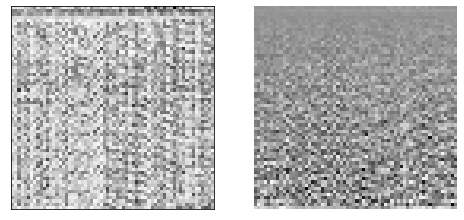

Number of PC:  10


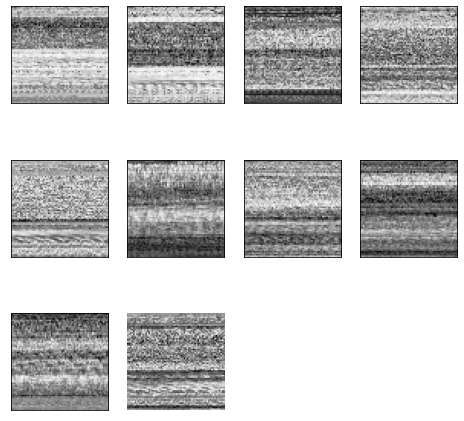

Number of PC:  15


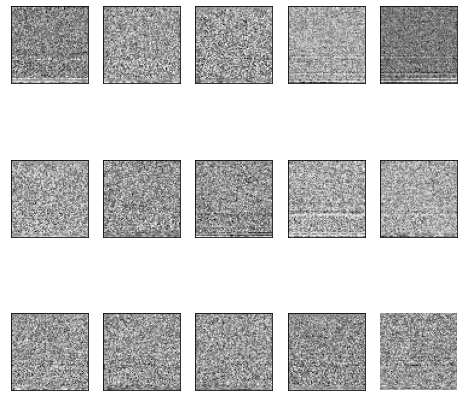

Number of PC:  31


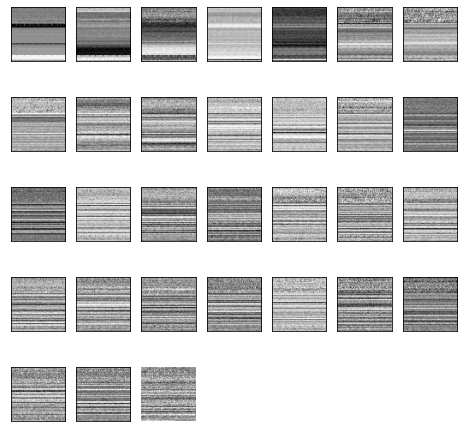

Number of PC:  6


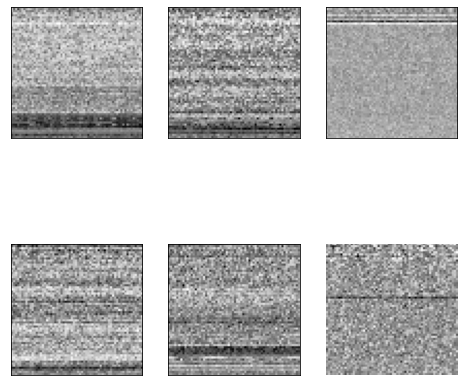

Number of PC:  40


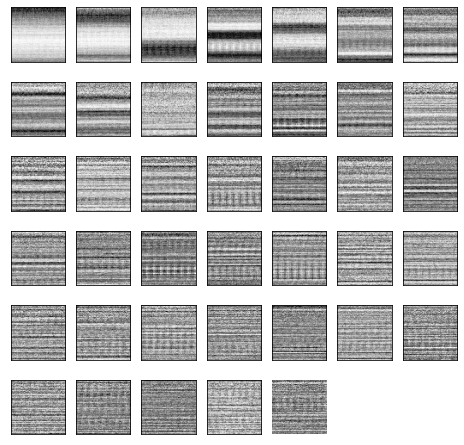

Number of PC:  103


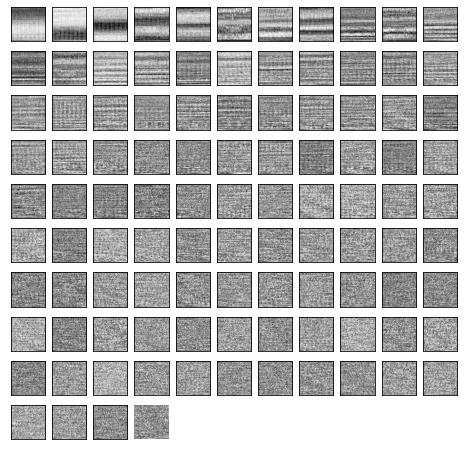

Number of PC:  3


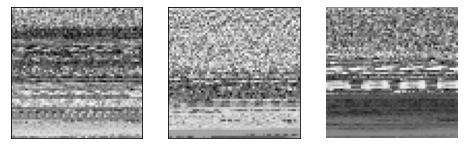

Number of PC:  45


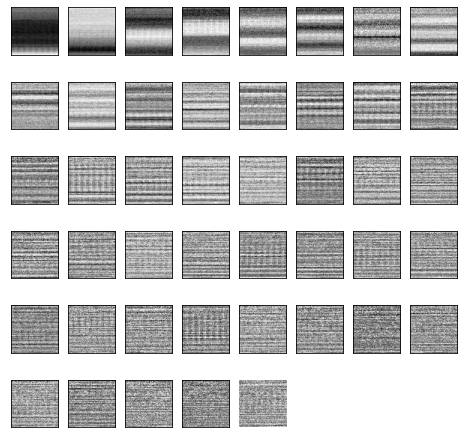

Number of PC:  2


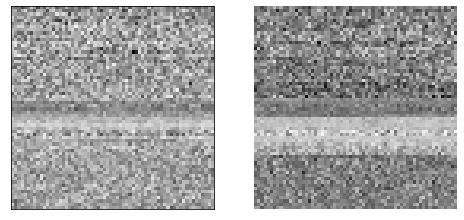

Number of PC:  4


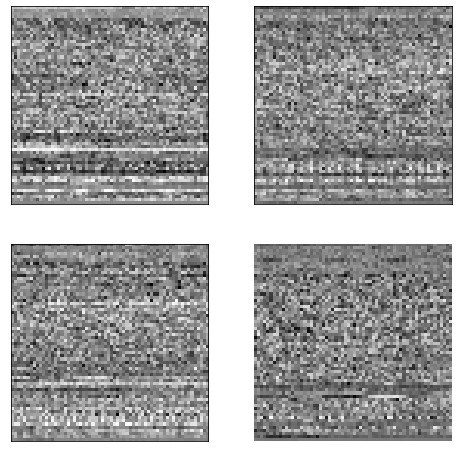

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:501: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


Number of PC:  1


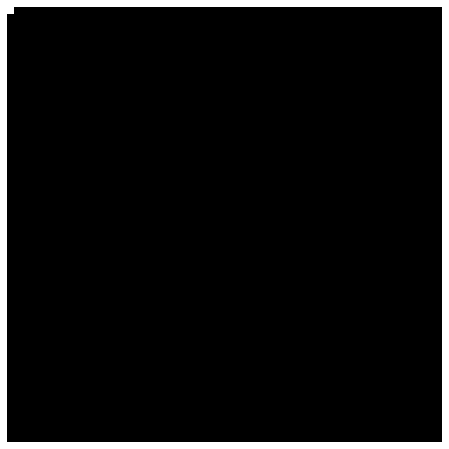

Number of PC:  7


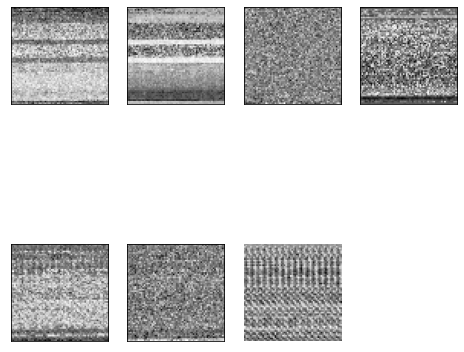

Number of PC:  2


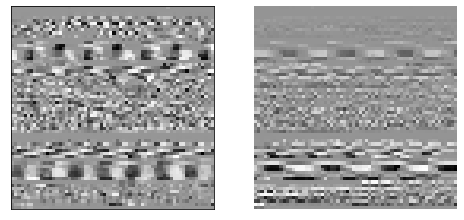

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hp\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\sklearn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 135.8 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=07f436863870660f3cc301270b84bae1dfd2d77cb23b57d4128ff48008feb869
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [28]:
for item in train_dict_img:
    plot_pca(eigenimages(train_dict_img[item], item))

In [ ]:
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)

In [ ]:
os.listdir()

In [ ]:
val_folder_path='val'
os.chdir(val_folder_path)

val_folder_list=os.listdir()

val_folder_list

val_dict={}

for item in val_folder_list:
    owd = os.getcwd()
    os.chdir(item)
    val_dict[item]=len(os.listdir())
    os.chdir(owd)

val_dict

In [ ]:
# Data to plot
labels = []
sizes = []

for x, y in val_dict.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.legend()
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(6)
  
plt.show()

In [ ]:
fig,x=plt.subplots(figsize=(8,8))
keys = list(val_dict.keys())
vals = list(val_dict.values())
sns.barplot(x=keys, y=vals)
plt.setp(x.get_xticklabels(), rotation=90)
plt.title('Malware Classes on Validation Data')
x.tick_params(labelsize=10)
x.tick_params(length=0, axis='x')
plt.tight_layout()
plt.show()